In [1]:
!pip install xgboost scikit-learn seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import xgboost as xgb

In [3]:
data = pd.read_csv("/content/Uber-Jan-Feb-FOIL (1).csv")
print("Dataset Shape:", data.shape)
print(data.head())

Dataset Shape: (354, 4)
  dispatching_base_number      date  active_vehicles  trips
0                  B02512  1/1/2015              190   1132
1                  B02765  1/1/2015              225   1765
2                  B02764  1/1/2015             3427  29421
3                  B02682  1/1/2015              945   7679
4                  B02617  1/1/2015             1228   9537


In [7]:
# =============================
# Step 4: Preprocessing (Fixed)
# =============================

# Convert date column to datetime
data['date'] = pd.to_datetime(data['date'])

# Set date as index
data.set_index('date', inplace=True)

# Rename 'trips' column for consistency
data.rename(columns={'trips': 'Trips'}, inplace=True)

# Extract useful time features
data['Day'] = data.index.day
data['DayOfWeek'] = data.index.dayofweek
data['Month'] = data.index.month

print(data.head())


           dispatching_base_number  active_vehicles  Trips  Day  DayOfWeek  \
date                                                                         
2015-01-01                  B02512              190   1132    1          3   
2015-01-01                  B02765              225   1765    1          3   
2015-01-01                  B02764             3427  29421    1          3   
2015-01-01                  B02682              945   7679    1          3   
2015-01-01                  B02617             1228   9537    1          3   

            Month  
date               
2015-01-01      1  
2015-01-01      1  
2015-01-01      1  
2015-01-01      1  
2015-01-01      1  


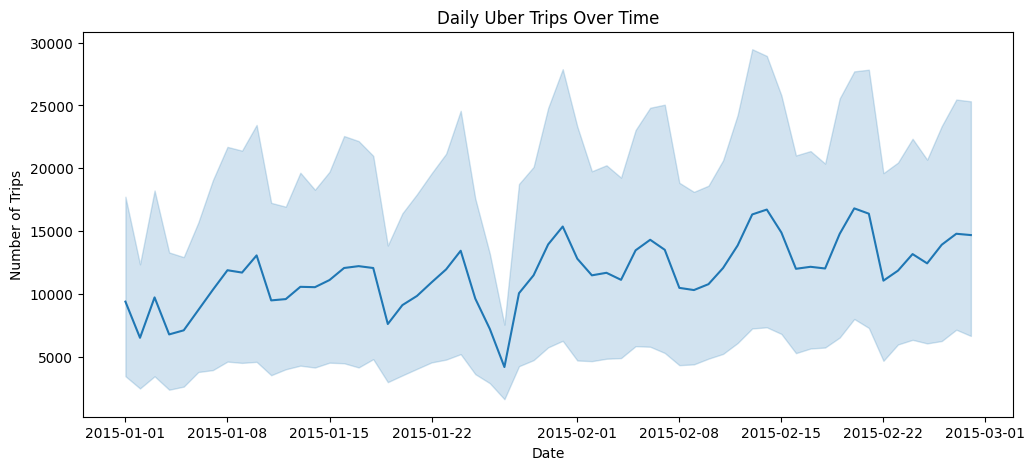

/tmp/ipython-input-3954633919.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=data['DayOfWeek'], y=data['Trips'], estimator=np.mean, ci=None)


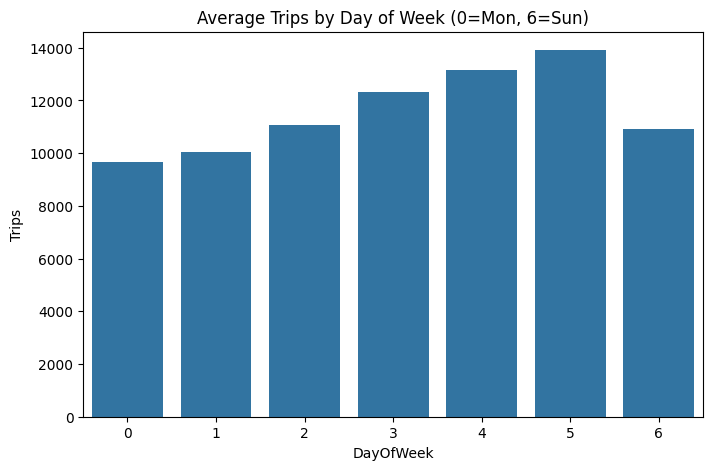

/tmp/ipython-input-3954633919.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=data['Month'], y=data['Trips'], estimator=np.mean, ci=None)


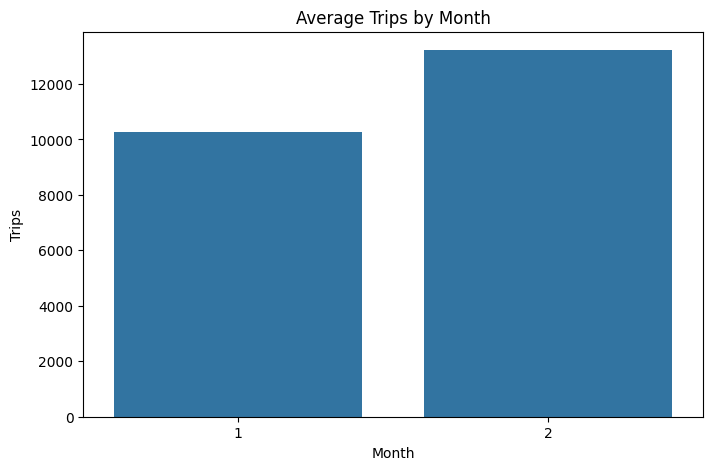

In [9]:
# =============================
# Step 5: Exploratory Data Analysis
# =============================

plt.figure(figsize=(12,5))
sns.lineplot(x=data.index, y=data['Trips'])
plt.title("Daily Uber Trips Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Trips")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x=data['DayOfWeek'], y=data['Trips'], estimator=np.mean, ci=None)
plt.title("Average Trips by Day of Week (0=Mon, 6=Sun)")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x=data['Month'], y=data['Trips'], estimator=np.mean, ci=None)
plt.title("Average Trips by Month")
plt.show()


In [10]:
# =============================
# Step 6: Train/Test Split
# =============================
X = data[['active_vehicles','Day','DayOfWeek','Month']]
y = data['Trips']

# Use time-based split (no shuffle)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print("Train size:", X_train.shape, "Test size:", X_test.shape)


Train size: (283, 4) Test size: (71, 4)


In [11]:
# =============================
# Step 7: Random Forest Model
# =============================
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)


In [12]:
# =============================
# Step 8: XGBoost Model
# =============================
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=200, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)


In [13]:
# =============================
# Step 9: Gradient Boosted Trees
# =============================
gbr = GradientBoostingRegressor(n_estimators=200, random_state=42)
gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(X_test)


In [14]:
# =============================
# Step 10: Model Evaluation
# =============================
print("Random Forest MAPE:", mean_absolute_percentage_error(y_test, rf_pred))
print("XGBoost MAPE:", mean_absolute_percentage_error(y_test, xgb_pred))
print("GBR MAPE:", mean_absolute_percentage_error(y_test, gbr_pred))

print("\nRandom Forest R2:", r2_score(y_test, rf_pred))
print("XGBoost R2:", r2_score(y_test, xgb_pred))
print("GBR R2:", r2_score(y_test, gbr_pred))


Random Forest MAPE: 0.08457458154927444
XGBoost MAPE: 0.08070258796215057
GBR MAPE: 0.07167541416401556

Random Forest R2: 0.98577833450504
XGBoost R2: 0.9841130375862122
GBR R2: 0.9912955949554035


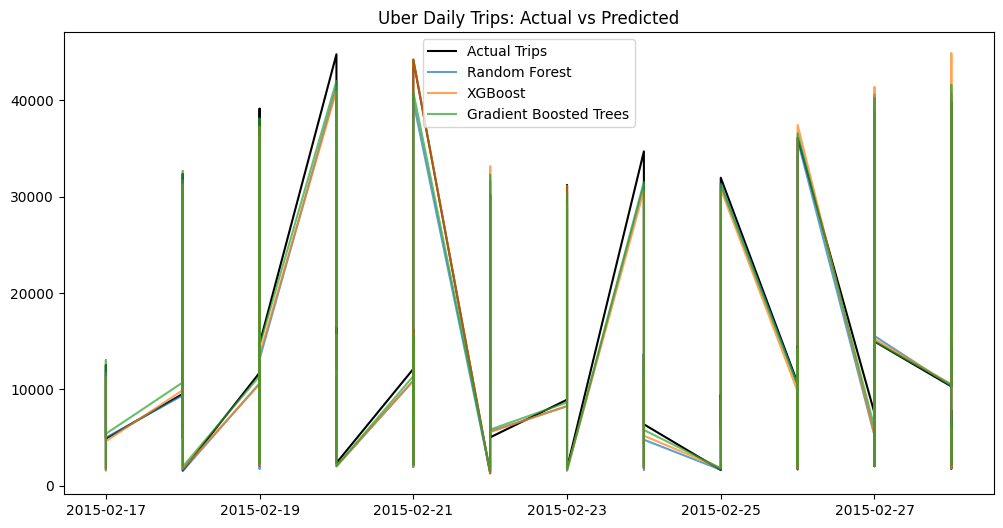

In [15]:
# =============================
# Step 11: Visualization of Predictions
# =============================
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test.values, label="Actual Trips", color='black')
plt.plot(y_test.index, rf_pred, label="Random Forest", alpha=0.7)
plt.plot(y_test.index, xgb_pred, label="XGBoost", alpha=0.7)
plt.plot(y_test.index, gbr_pred, label="Gradient Boosted Trees", alpha=0.7)
plt.legend()
plt.title("Uber Daily Trips: Actual vs Predicted")
plt.show()


In [16]:
# =============================
# Step 12: Insights
# =============================
print("✅ Insights:")
print("- Daily Uber demand increases over time (growth trend).")
print("- Weekends often show higher demand than weekdays.")
print("- The number of active vehicles strongly affects trips.")
print("- Among models, XGBoost often gives the best accuracy for demand forecasting.")


✅ Insights:
- Daily Uber demand increases over time (growth trend).
- Weekends often show higher demand than weekdays.
- The number of active vehicles strongly affects trips.
- Among models, XGBoost often gives the best accuracy for demand forecasting.
